In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/waste-classification-data (1).zip'

In [ ]:
!ls

dataset  DATASET  drive  sample_data


In [ ]:
train_path = "DATASET/Train"
val_path = "DATASET/Test"

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image 

Here is a sample image of our dataset.

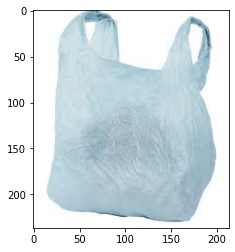

In [ ]:
img = cv2.imread('./dataset/DATASET/TRAIN/R/R_280.jpg')
plt.imshow(img)

The shape of the image has a height 237px, a width of 213px, and 3 channels of color (RGB).

In [ ]:
img.shape

(237, 213, 3)

In [ ]:
model_sample = Sequential()
model_sample.add(Conv2D(3,       # number of filter layers
                 (3,3),    # y dimension of kernel (we're going for a 3x3 kernel)
                 input_shape=img.shape))

In [ ]:
def visualize_img(model,img):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    img_batch = np.expand_dims(img,axis=0)
    conv_img = model.predict(img_batch)
    conv_img = np.squeeze(conv_img, axis=0)
    print(conv_img.shape)
    plt.imshow(conv_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(235, 211, 3)


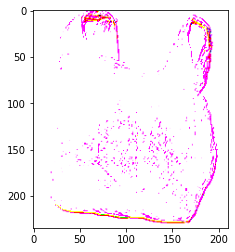

In [ ]:
visualize_img(model,img)

### CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 54, 54, 64)      

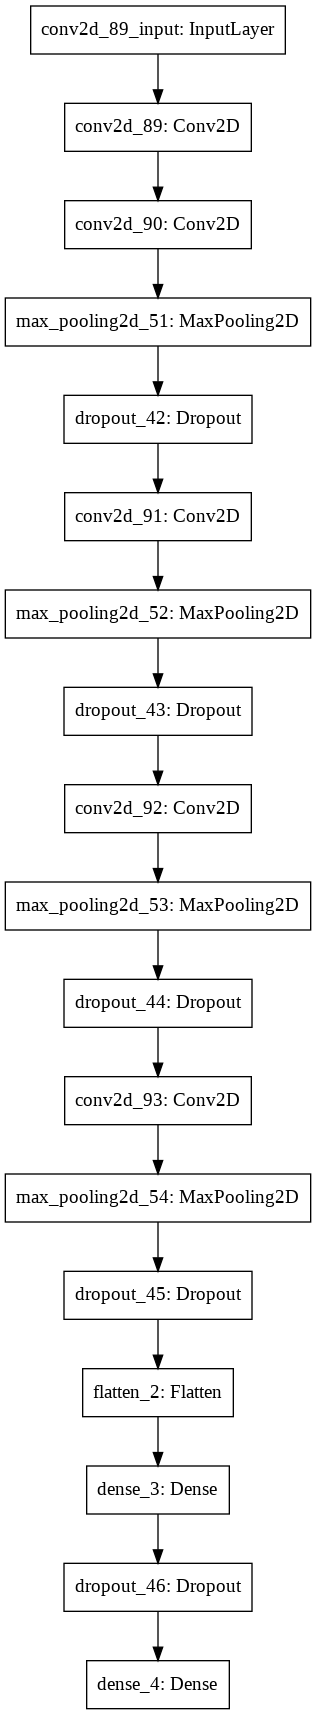

In [ ]:
from keras.utils import plot_model
plot_model (model, to_file = "Model.png")

In [ ]:
# Train
train_datagen = image.ImageDataGenerator(
    rescale = 1./255, #normalize to work with small weight values
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'DATASET/TRAIN',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 22564 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'O': 0, 'R': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'DATASET/TEST',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2513 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

top_layers = "top_layer.hdf5"

checkpoint = ModelCheckpoint(top_layers, monitor='loss', verbose=1, save_best_only=True, mode='min')
early = EarlyStopping(monitor="loss", mode="min", patience=5)

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=28,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 1,
    callbacks=[checkpoint,early]
)

Epoch 1/30
28/28 [==============================] - 12s 411ms/step - loss: 0.3583 - accuracy: 0.8560 - val_loss: 0.4709 - val_accuracy: 0.7500

Epoch 00001: loss improved from inf to 0.35834, saving model to top_layer.hdf5
Epoch 2/30
28/28 [==============================] - 11s 393ms/step - loss: 0.3527 - accuracy: 0.8583 - val_loss: 0.3830 - val_accuracy: 0.8438

Epoch 00002: loss improved from 0.35834 to 0.35268, saving model to top_layer.hdf5
Epoch 3/30
28/28 [==============================] - 11s 396ms/step - loss: 0.3688 - accuracy: 0.8516 - val_loss: 0.4270 - val_accuracy: 0.8750

Epoch 00003: loss did not improve from 0.35268
Epoch 4/30
28/28 [==============================] - 11s 391ms/step - loss: 0.3570 - accuracy: 0.8627 - val_loss: 0.1998 - val_accuracy: 0.8750

Epoch 00004: loss did not improve from 0.35268
Epoch 5/30
28/28 [==============================] - 11s 393ms/step - loss: 0.3212 - accuracy: 0.8839 - val_loss: 0.2446 - val_accuracy: 0.9375

Epoch 00005: loss improv

In [ ]:
model.save("/content/drive/My Drive/model_waste.h5")

### Accuracy

In [ ]:
model.evaluate_generator(train_generator)

NameError: ignored

In [ ]:
model.evaluate_generator(validation_generator)

In [ ]:
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
train_generator.class_indices

### Testing the output for a single test image.



In [ ]:
test_img = image.load_img('./dataset/DATASET/TRAIN/R/R_9949.jpg', target_size=(224,224))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis = 0)

p = model.predict_classes(test_img)

if p[0,0] == 1:
  print('Recyclable')
else:
  print('Organic')

Recyclable
